# Activity 1.1

First importing the libraries that I will need in this activity.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection
from PIL import Image
import scipy.stats as ss
from scipy.interpolate import interp1d

##### 1.) and 2.) Creating the sinusoid along the x-axis and grating frequency.

Rescaling formula:
\begin{equation}
x_{\rm{scaled}} = \frac{x - \rm{min}(x)}{\rm{max}(x) - \rm{min}(x)}
\end{equation}

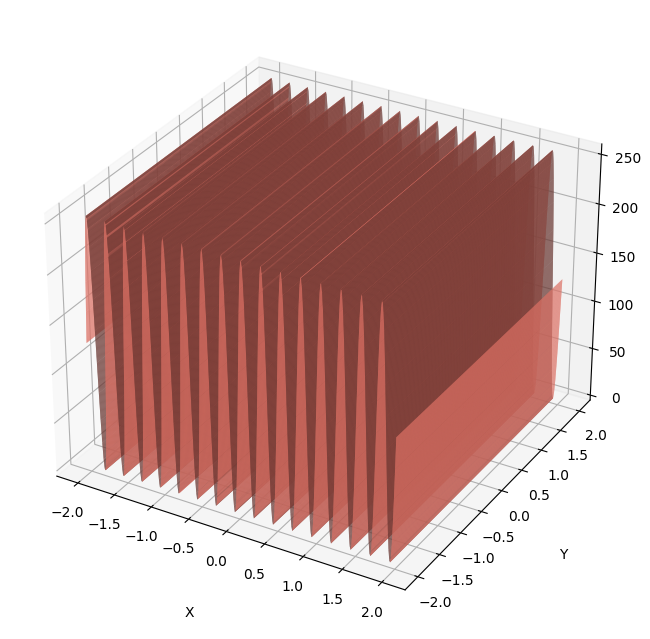

In [66]:
N = 400                    # number of data points
x = np.linspace(-2,2,N)       # range of x values
y = np.linspace(-2,2,N)       # range of y values
X,Y = np.meshgrid(x,y)      # making a mesh from the x and y values

f = 2*np.pi*4                 # cycles per cm
half_amp = 255/2              
R = np.sin(f*X)

R = 255*(R - min(map(min, R)))/(max(map(max,R)) - min(map(min, R)))


A = np.zeros(R.shape)
A[R>half_amp] = 1

fig = plt.figure(figsize = (8,10))
ax = plt.axes(projection='3d')

surface_color = ax.plot_surface(X, Y, R, color = "salmon", rstride=1, cstride=1, alpha=None)

ax.set_xlabel('X', labelpad=20)
ax.set_ylabel('Y', labelpad=20)
ax.set_zlabel('R', labelpad=20)
plt.show()


In [67]:
print(min(map(min, R)))

0.0


Top view of the sine wave using imshow: 


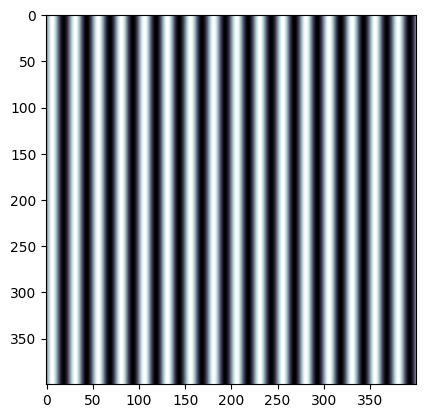

The grid thing: 


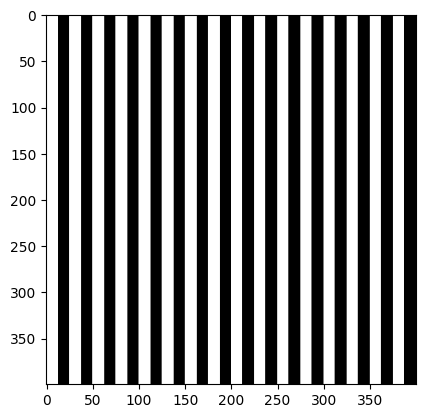

In [68]:
A = np.zeros(R.shape)
A[R>255/2] = 1

print("Top view of the sine wave using imshow: ")
fig, ax = plt.subplots()
ax.imshow(R, cmap = "bone")
plt.show()

print("The grid thing: ")
fig, ax = plt.subplots()
ax.imshow(A, cmap = "gray")
plt.show()

#### 3.) Hubble's Primary Mirror

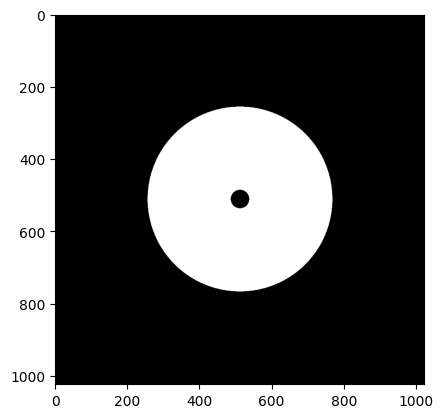

<Figure size 640x480 with 0 Axes>

In [69]:
N = 1024 #the higher num is the finer
x = np.linspace(-1,1,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))

outer_radius = 0.5
inner_radius = outer_radius/10

A[R < outer_radius] = 1.0
A[R < inner_radius] = 0

#display as an image

plt.imshow(A, cmap = "gray")
#display as a 3D surface in Cartesian coordinates
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,A)
plt.show()

#### 4.) Hexagon arrray

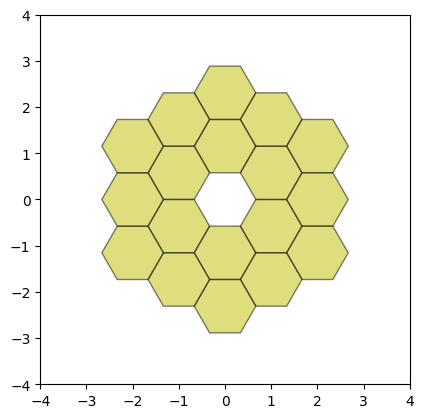

In [70]:
# source: https://www.geeksforgeeks.org/matplotlib-patches-regularpolygon-class-in-python/
# coords: (x,y,orientation)
coord = [[0, 1, -1],
         [-1, 1, 0],
         [-1, 0, 1],
         [0, -1, 1],
         [1, -1, 0],
         [1, 0, -1],
         [0,3,-1],
         [1,3,0],
         [2,1,-1],
         [2,0,0],
         [2,-1, 1],
         [1,-2,1],
         [0,-4,0],
         [-1, -2, 1],
         [-2, -1, 1],
         [-2, 0, 0],
         [-2, 1, -1],
         [-1, 2, -1]]
 
colors = ["y" for c in coord]
 
 
# Horizontal cartesian coords
hcoord = [c[0] for c in coord]
 
# Vertical cartesian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3.
          for c in coord]


 
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
 
# Add some coloured hexagons
for x, y, c in zip(hcoord, vcoord, colors):
     
    # matplotlib understands lower
    # case words for colours
    color = c[0].lower()
    hex = RegularPolygon((x, y),
                         numVertices = 6,
                         radius = 2. / 3.,
                         orientation = np.radians(30),
                         facecolor = color,
                         alpha = 0.5,
                         edgecolor ='k')
     
    ax.add_patch(hex)
    
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
plt.show()

# 1.2

Creating olympic logo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


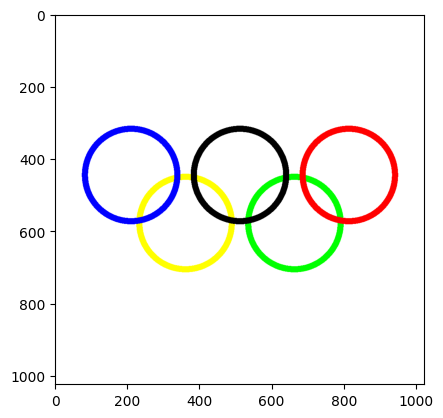

In [71]:
N = 1024
x = np.linspace(-15,15, N)
y = x
X,Y = np.meshgrid(x,y)
Blue, Yellow, Black, Green, Red= np.zeros((N,N),dtype=np.uint8), np.zeros((N,N),dtype=np.uint8), np.zeros((N,N),dtype=np.uint8), np.zeros((N,N),dtype=np.uint8), np.zeros((N,N),dtype=np.uint8),

#draw colored circles
Rt, Rc, deg = 3, 4, 30
xt, yt = Rt*np.cos(deg*np.pi/180), Rt*np.sin(deg*np.pi/180)
I = np.ones((N,N,3))
I[...,0] = 255
I[...,1] = 255
I[...,2] = 255


R_Blue = np.sqrt((X+3.4*xt)**2 + (Y+1.3*yt)**2)
R_Black = np.sqrt((X)**2 + (Y+1.3*yt)**2)
R_Red = np.sqrt((X-3.4*xt)**2 + (Y+1.3*yt)**2)
R_Yellow = np.sqrt((X+1.7*xt)**2 + (Y-1.3*yt)**2)
R_Green = np.sqrt((X-1.7*xt)**2 + (Y-1.3*yt)**2)

# Lower row of circles
Green[R_Green<Rc] = 255
Green[R_Green == R_Black] = 0
Green[R_Green == R_Red] = 0
Green[R_Green < (Rc -0.5)] = 0

Yellow[R_Yellow < Rc] = 255
Yellow[R_Yellow == R_Blue] = 0 
Yellow[R_Yellow == R_Black] = 0 
Yellow[R_Yellow < (Rc -0.5)] = 0

# Upper row of circles
Blue[R_Blue<Rc]= 255
Blue[R_Blue < (Rc -0.5)] = 0

Black[R_Black<Rc] = 255
Black[R_Black < (Rc -0.5)] = 0

Red[R_Red<Rc] = 255
Red[R_Red < (Rc -0.5)] = 0



I[...,0] = 255 - Blue - Black                           #Red
I[...,1] = 255 - Blue - Black  - Red                    #Green
I[...,2] = 255 - Black - Red                            #Blue


I[...,2] = I[...,2]  - Yellow + Blue                  

I[...,0] = I[...,0] - Green + Red
I[...,2] = I[...,2] - Green 






I[I<0] = 0
I[I>255] = 255

fig = plt.figure()
plt.imshow(I)

plt.show()

In [72]:
img = I.astype(np.uint8)
plt.imsave("coloredcircle.jpg",img)
plt.imsave("coloredcircle.bmp",img)
plt.imsave("coloredcircle.png",img)
plt.imsave("coloredcircle.tiff",img)

# 1.4

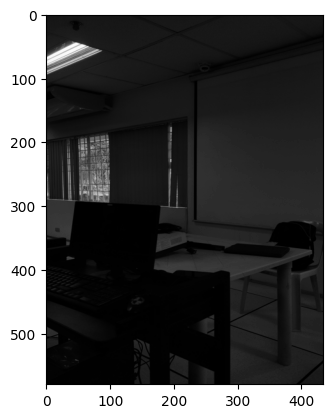

In [73]:
# read the image 
image = Image.open('.\dark_picture.jpg')

# Converting to grayscale
grayscale_image = np.array(image.convert('L'))

# Resizing image to make my program faster
processed_image = np.array(Image.fromarray(grayscale_image).resize(size=(434, 580)))  #rescaled to 1/8 its original resolution

# # Normalizing pixel values
# processed_image = (processed_image - np.amin(processed_image))/(np.amax(processed_image) - np.amin(processed_image))

# Plotting
plt.imshow(processed_image, cmap = "gray")
plt.show()
 


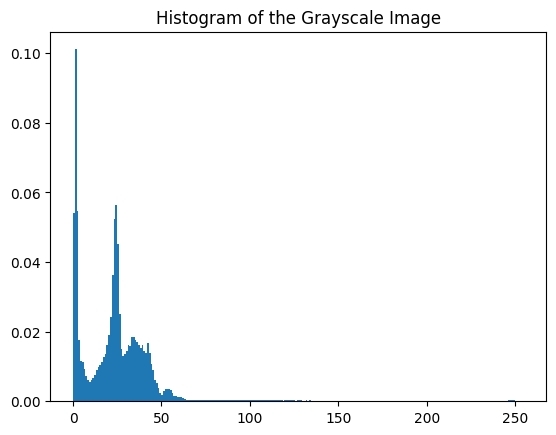

In [74]:
# Making the histogram of the grayscaled image
# Flattening image to make the program more efficient
flattened = processed_image.flatten()

# Plotting histogram
plt.hist(flattened, bins = 256, density = True)     # using 256 bins to accomodate all pixel intensity values
plt.title("Histogram of the Grayscale Image")
plt.show()

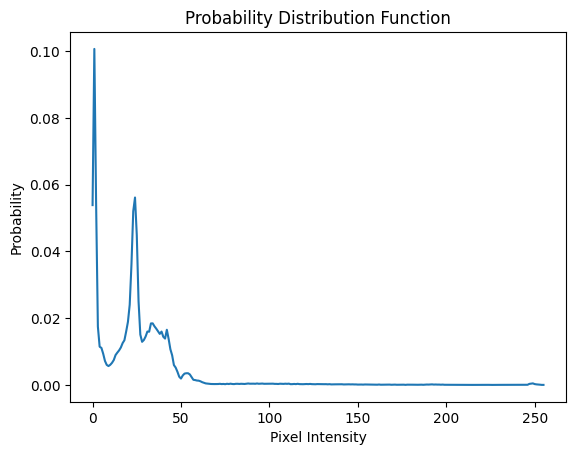

In [75]:
# Now making the PDF


# Getting hist values and normalizing them
hist_values, bin_edges  = np.histogram(flattened, bins = 256)
norm_hist_values = hist_values/processed_image.size
# Plot PDF
x = np.arange(0,256,1)

fig, ax = plt.subplots()
ax.plot(x, norm_hist_values)
ax.set_ylabel("Probability")
ax.set_xlabel("Pixel Intensity")
plt.title("Probability Distribution Function")
plt.show()

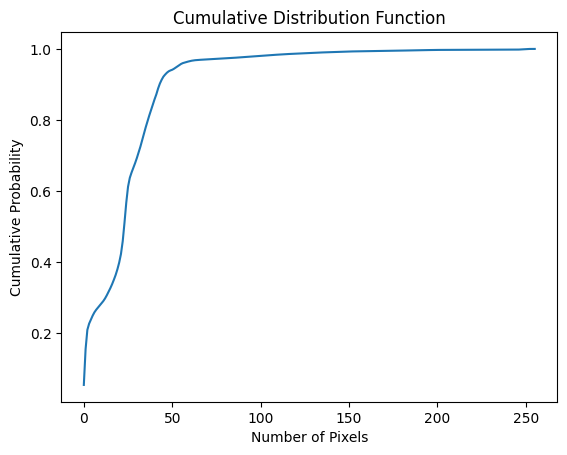

In [76]:
# Now making the CDF
CDF = np.cumsum(norm_hist_values)


# Plot normal CDF
fig, ax = plt.subplots()
ax.plot(x, CDF)
ax.set_ylabel("Cumulative Probability")
ax.set_xlabel("Number of Pixels")
plt.title("Cumulative Distribution Function")
plt.show()

In [77]:
# for integral
def integrate(y_vals, h):
    i = 1
    total = y_vals[0] + y_vals[-1]
    for y in y_vals[1:-1]:
        if i % 2 == 0:
            total += 2 * y
        else:
            total += 4 * y
        i += 1
    return total * (h / 3.0)

def integral_simpsons(N, a, b, arr):
    h = (a+b)/N
    I_1 = arr[a]
    I_2 = arr[b]
    I_3, I_4 = 0, 0

    for k in range(1,len(arr)-1):
        if k%2 == 1:
            I_3 += arr[k]
        else: 
            I_4 += arr[k]
        
    I = (1/3)*(I_1 + I_2 + 4*I_3 + 2*I_4)
    
    return I

# Test to see if histogram is normalized
print(integrate(norm_hist_values,bin_edges[3]-bin_edges[2]))


0.9811159379717567


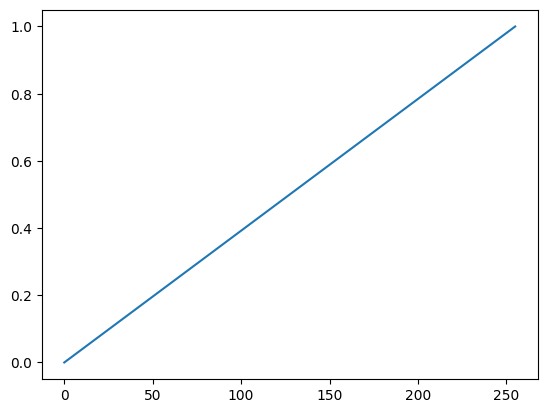

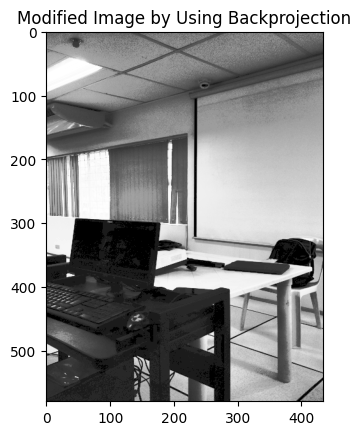

In [78]:
# Now applying histogram backprojecting
desired_CDF = x/255
plt.plot(desired_CDF)
plt.show()

new_GS = np.interp(CDF[flattened], x, desired_CDF)
new_GS = np.reshape(new_GS, processed_image.shape)

plt.imshow(new_GS, cmap = "gray")
plt.title("Modified Image by Using Backprojection")
plt.show()

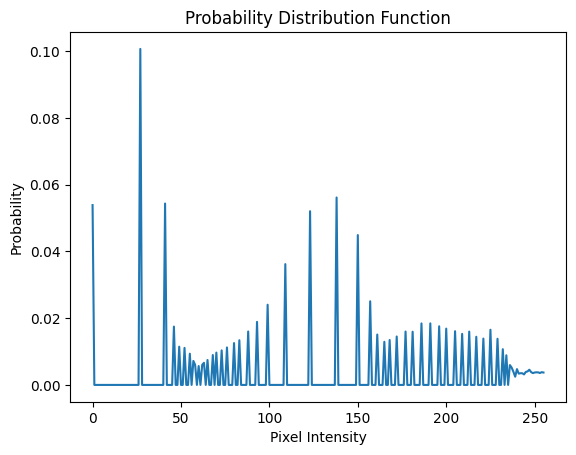

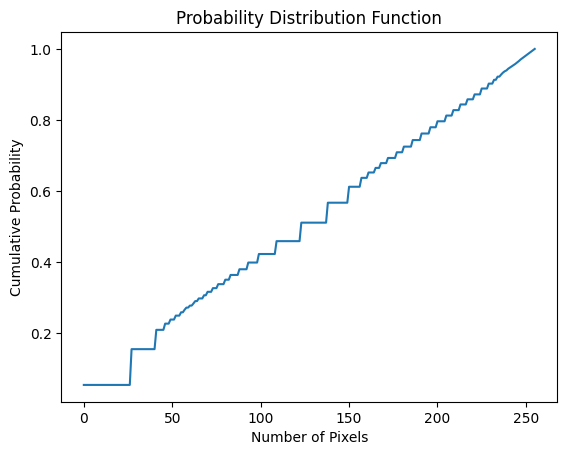

1.5138575489762085e-05


In [79]:
# Getting hist values and normalizing them
flattened = new_GS.flatten()
norm_hist_values, bin_edges  = np.histogram(flattened, bins = 256)
norm_hist_values = norm_hist_values/np.amax(new_GS.size)


# Plot PDF
x = np.arange(0,256,1)

fig, ax = plt.subplots()
ax.plot(x, norm_hist_values)
ax.set_ylabel("Probability")
ax.set_xlabel("Pixel Intensity")
plt.title("Probability Distribution Function")
plt.show()

# Now making the CDF
CDF = np.cumsum(norm_hist_values)


# Plot normal CDF
fig, ax = plt.subplots()
ax.plot(x, CDF)
ax.set_ylabel("Cumulative Probability")
ax.set_xlabel("Number of Pixels")
plt.title("Probability Distribution Function")
plt.show()

print(integrate(norm_hist_values,bin_edges[3]-bin_edges[2]))

# 1.5

for contrast stretching:
$$
I_{\rm{new}} = \frac{I_{\rm{old}} - I_{\rm{min}}}{I_{\rm{max}} - I_{\rm{min}}}
$$

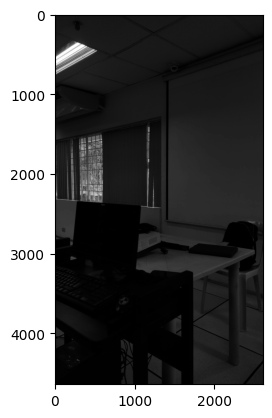

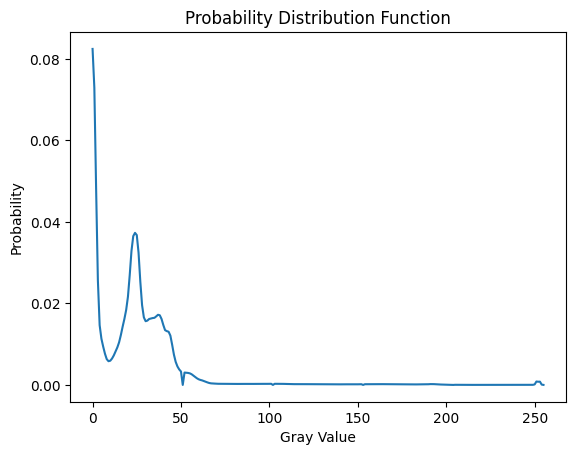

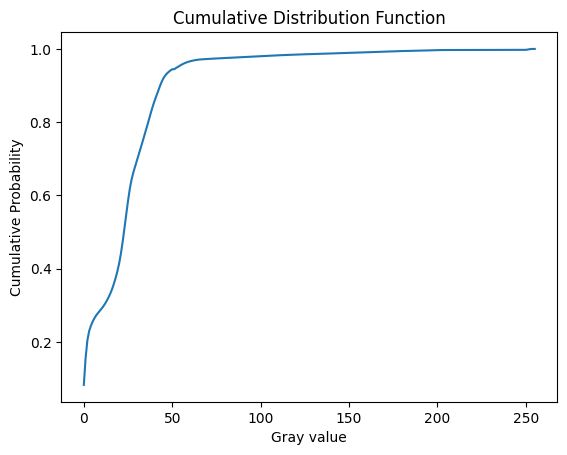

In [117]:
# read the image 
image = Image.open('.\dark_picture.jpg')

# Converting to grayscale
processed_image = np.array(image.convert('L'))

# Resizing image to make my program faster
# processed_image = np.array(Image.fromarray(grayscale_image).resize(size=(434, 580)))  #rescaled to 1/8 its original resolution

# Plotting
plt.imshow(processed_image, cmap = "gray")
plt.show()

# Now making the PDF
flattened = processed_image.flatten()

# Getting hist values and normalizing them
hist_values, bin_edges  = np.histogram(flattened, bins = 256)
norm_hist_values = hist_values/processed_image.size

# Plot PDF
x = np.arange(0,256,1)
fig, ax = plt.subplots()
ax.plot(x, norm_hist_values)
ax.set_ylabel("Probability")
ax.set_xlabel("Gray Value")
plt.title("Probability Distribution Function")
plt.show()

# Now making the CDF
CDF = np.cumsum(norm_hist_values)


# Plot normal CDF
fig, ax = plt.subplots()
ax.plot(x, CDF)
ax.set_ylabel("Cumulative Probability")
ax.set_xlabel("Gray value")
plt.title("Cumulative Distribution Function")
plt.show()

44.0 1.0


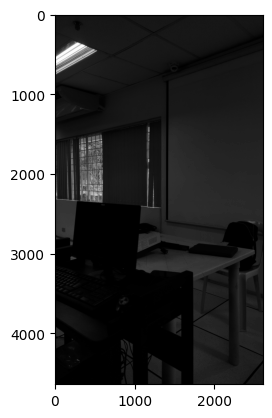

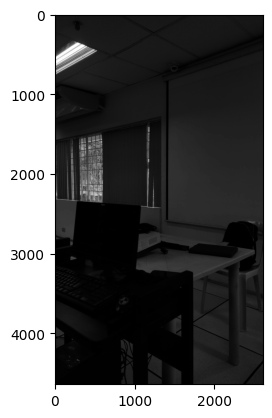

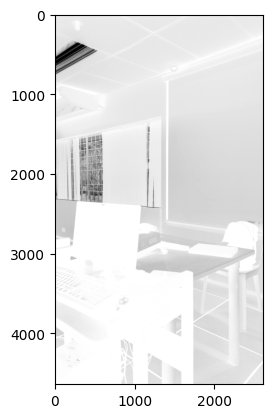

In [124]:
# Applying contrast stretching
Imin = np.percentile(processed_image, 10)
Imax = np.percentile(processed_image, 90)
contrast_stretched = 255*(processed_image - Imin)/(Imax - Imin)
contrast_stretched[contrast_stretched < 0] = 0
print(Imax, Imin)
plt.imshow(contrast_stretched, cmap = "gray")
plt.show()

plt.imshow(processed_image, cmap = "gray")
plt.show()

plt.imshow(processed_image - contrast_stretched, cmap = "gray")
plt.show()

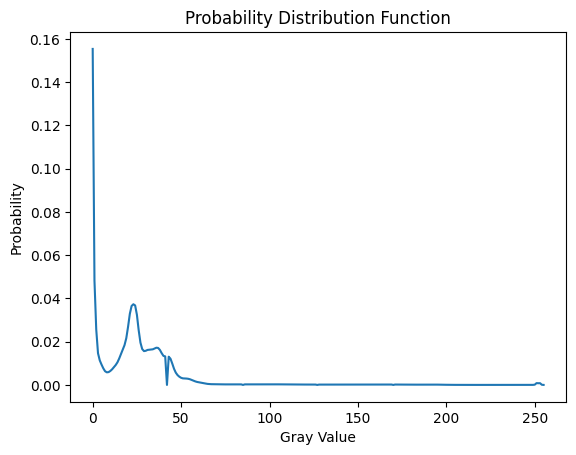

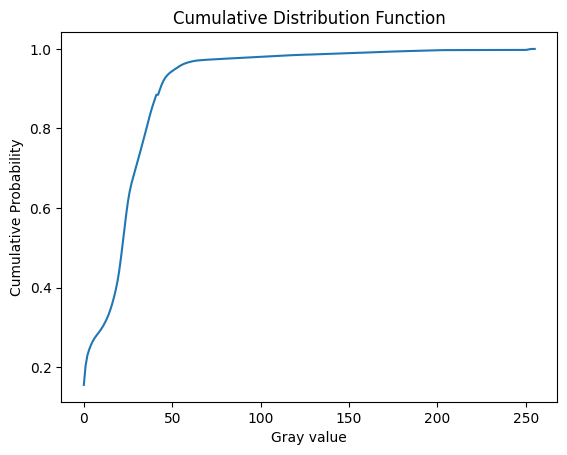

In [122]:
# Now making the PDF
contrast_flattened = contrast_stretched.flatten()

# Getting hist values and normalizing them
hist_values, bin_edges  = np.histogram(contrast_flattened, bins = 256)
norm_hist_values = hist_values/processed_image.size
# Plot PDF
x = np.arange(0,256,1)

# Plot PDF
x = np.arange(0,256,1)
fig, ax = plt.subplots()
ax.plot(x, norm_hist_values)
ax.set_ylabel("Probability")
ax.set_xlabel("Gray Value")
plt.title("Probability Distribution Function")
plt.show()

# Now making the CDF
CDF = np.cumsum(norm_hist_values)


# Plot normal CDF
fig, ax = plt.subplots()
ax.plot(x, CDF)
ax.set_ylabel("Cumulative Probability")
ax.set_xlabel("Gray value")
plt.title("Cumulative Distribution Function")
plt.show()

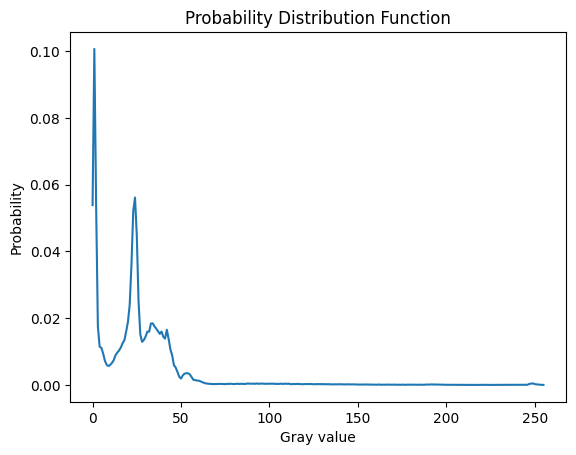

In [101]:
# Now making the PDF
contrast_flattened = contrast_stretched.flatten()

# Getting hist values and normalizing them
hist_values, bin_edges  = np.histogram(contrast_flattened, bins = 256)
norm_hist_values = hist_values/processed_image.size
# Plot PDF
x = np.arange(0,256,1)

fig, ax = plt.subplots()
ax.plot(x, norm_hist_values)
ax.set_ylabel("Probability")
ax.set_xlabel("Gray value")
plt.title("Probability Distribution Function")
plt.show()

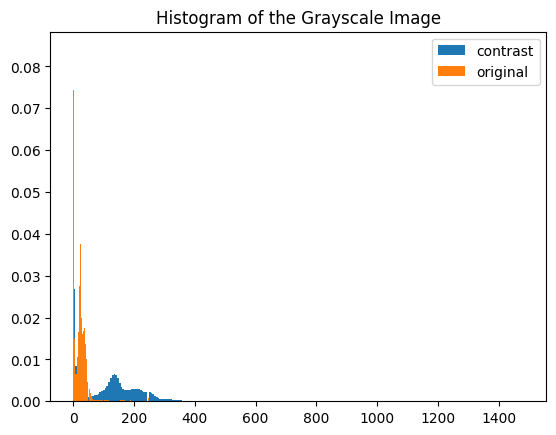

In [127]:
flattened = processed_image.flatten()

# Plotting histogram
fig, ax = plt.subplots()
ax.hist(contrast_flattened, bins = 256, label= "contrast", density = True)
ax.hist(flattened, bins = 256, label = "original", density = True)     # using 256 bins to accomodate all pixel intensity values
plt.title("Histogram of the Grayscale Image")
plt.legend()
plt.show()

# 1.6

## Contrast Stretching

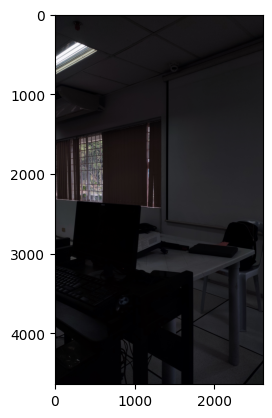

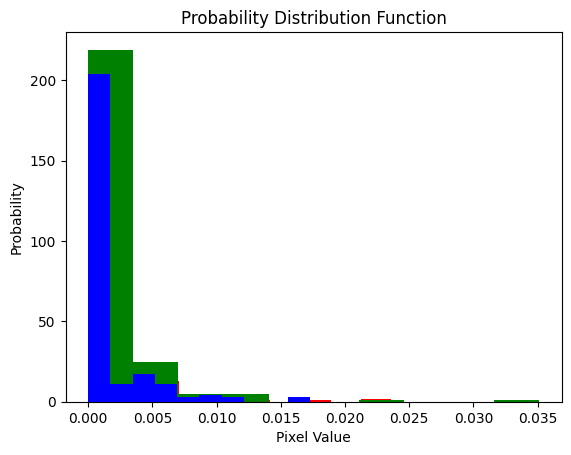

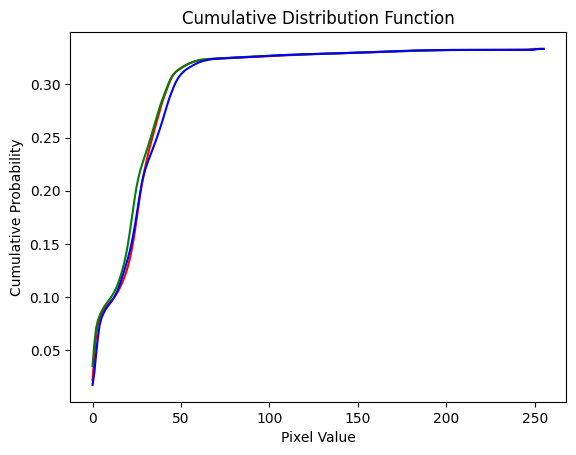

In [134]:
# read the image 
I = Image.open('.\dark_picture.jpg')
I = np.array(I, np.uint8)

# Plotting
plt.imshow(I, cmap = "gray")
plt.show()

# Getting the color channels
I_R = I[:,:,0]
I_G = I[:,:,1]
I_B = I[:,:,2]


# Getting hist values and normalizing them
R_hist_values, bin_edges  = np.histogram(I_R, bins = 256)
G_hist_values, bin_edges  = np.histogram(I_G, bins = 256)
B_hist_values, bin_edges  = np.histogram(I_B, bins = 256)
R_norm_hist_values = R_hist_values/I.size
G_norm_hist_values = G_hist_values/I.size
B_norm_hist_values = B_hist_values/I.size


# Plot PDF
x = np.arange(0,256,1)
fig, ax = plt.subplots()
ax.hist(R_norm_hist_values, color = "r", label = "Red pixel values")
ax.hist(G_norm_hist_values, color = "g", label = "Green pixel values")
ax.hist(B_norm_hist_values, color = "b", label = "Blue pixel values")
ax.set_ylabel("Probability")
ax.set_xlabel("Pixel Value")
plt.title("Probability Distribution Function")
plt.legend()
plt.show()

# Now making the CDF
R_CDF = np.cumsum(R_norm_hist_values)
G_CDF = np.cumsum(G_norm_hist_values)
B_CDF = np.cumsum(B_norm_hist_values)


# Plot normal CDF
fig, ax = plt.subplots()
ax.plot(x, R_CDF, color = "r", label = "Red pixel values")
ax.plot(x, G_CDF, color = "g", label = "Green pixel values")
ax.plot(x, B_CDF, color = "b", label = "Blue pixel values")
ax.set_ylabel("Cumulative Probability")
ax.set_xlabel("Pixel Value")
plt.title("Cumulative Distribution Function")
plt.legend()
plt.show()